## Working with WKT, GeoJSON, and Bounding Boxes

### Introduction

In geospatial analysis, accurately defining geographic boundaries is crucial for effective data retrieval and analysis. Bounding boxes, Well-Known Text (WKT), and GeoJSON are essential concepts used to represent and manipulate these boundaries. Understanding these concepts and how to transform them is vital when working with tools like OpenEO.

### Objective

The objective of this tutorial is to teach you how to work with bounding boxes, WKT, and GeoJSON formats, and to ensure that these geographic boundaries are compatible with the OpenEO platform. You will learn how to define bounding boxes using online tools, visualize them, and transform their coordinate reference systems (CRS) to ensure compatibility with global geospatial tools.

### In this notebook, you will explore the following concepts:

- **Bounding Boxes**: Learn how to create and visualize bounding boxes, which are rectangular boundaries that define specific geographic areas of interest.

- **WKT (Well-Known Text) and GeoJSON**: Understand how these formats represent geographic data and how to convert them into a bounding box format with defined coordinates (east, west, north, south) for use in OpenEO.

- **Coordinate Reference Systems (CRS)**: Explore the importance of using the WGS84 CRS in OpenEO, and learn how to convert bounding boxes from local CRS, like SWEREF 99 TM (EPSG:3006), to WGS84.

### Tools You'll Use:

- **OpenEO**: To interact with satellite data and perform spatial operations.
- **Shapely**: For advanced geometric operations, including transforming coordinates between different CRS.
- **GeoPandas**: For managing geospatial data and visualizing bounding boxes.
- **Matplotlib**: For visualizing the bounding boxes and results of your analysis.

### Learning Outcomes:

By the end of this tutorial, you will be able to:

- Define and manipulate bounding boxes using WKT and GeoJSON formats.
- Convert and ensure that your bounding boxes are in the WGS84 CRS for compatibility with OpenEO.
- Visualize bounding boxes to better understand their spatial extent.
- Use bounding boxes effectively in OpenEO to query and retrieve geospatial data.

### Let's Begin:

We'll start by generating bounding boxes using online tools, followed by converting and visualizing them in Python, and finally ensuring that they are correctly formatted and transformed for use in OpenEO.


## 1. Generate Bounding Boxes Using Online Tools

In this exercise, we'll generate a bounding box for the city of Västerås using the [Bounding Box Tool by KlokanTech](https://boundingbox.klokantech.com/). We'll export the bounding box in both **WKT** and **GeoJSON** formats, and examine the results.

### Steps

1. **Open the Bounding Box Tool**: Navigate to [Bounding Box Tool by KlokanTech](https://boundingbox.klokantech.com/).
   
2. **Select Västerås**: Use the map to zoom into Västerås, Sweden. You can find Västerås at approximately these coordinates:
   - **Latitude**: 59.6162° N
   - **Longitude**: 16.5528° E
   
3. **Draw the Bounding Box**: Click on the map to draw a bounding box that encapsulates the city. Adjust the box to fit your area of interest around Västerås.

4. **Export the Bounding Box**:
   - Select **WKT** from the dropdown menu and copy the result.
   - Select **GeoJSON** from the dropdown menu and copy the result.

### Results

Below are the WKT and GeoJSON representations of the bounding box you created for Västerås:

#### WKT Format   
`POLYGON((16.4677 59.5735, 16.4677 59.6588, 16.6379 59.6588, 16.6379 59.5735, 16.4677 59.5735))`

**Explanation**:  
The WKT format represents the bounding box as a `POLYGON` with a series of coordinates that define the four corners of the rectangle. In this case, the bounding box starts at the bottom-left corner (longitude 16.4677, latitude 59.5735), moves clockwise around the rectangle, and returns to the starting point to close the polygon.
#### GeoJSON Format

Below is the GeoJSON representation of the bounding box you created for Västerås:

```json
{
  "type": "Polygon",
  "coordinates": [
    [
      [16.4677, 59.5735],
      [16.4677, 59.6588],
      [16.6379, 59.6588],
      [16.6379, 59.5735],
      [16.4677, 59.5735]
    ]
  ]
}


**Explanation**: 
The GeoJSON format represents the bounding box as a Polygon object. The coordinates array contains an array of arrays, where each inner array represents a vertex of the polygon, listed in the order they are connected. Similar to WKT, the GeoJSON starts at one corner of the rectangle, moves around the box, and closes the polygon by returning to the starting point.

## 2. Understanding the OpenEO Bounding Box Structure

In OpenEO, a bounding box can be also be represented using a dictionary structure that defines the four corners of the rectangle:

This structure is straightforward, with `east`, `west`, `north`, and `south` representing the bounding limits of the area. The OpenEO API allows you to define bounding boxes either using this dictionary format or as a GeoJSON object.

To better understand how these coordinates map to a WKT `POLYGON`, let’s break down the relationship between the OpenEO bounding box and the WKT format.
### Example Bounding Box for Västerås
bbox = {
    'east': 16.6379,
    'south': 59.5735,
    'west': 16.4677,
    'north': 59.6588,
}
#### Mapping the Bounding Box to WKT

The WKT format represents the bounding box as a `POLYGON`, and the coordinates follow this sequence:

1. **First Corner**: (`west` (min Long), `south`(min Lat)  )
2. **Second Corner**: (`west`(min Long), `north` (max Lat) )
3. **Third Corner**: (`east` (max Long), `north` (max Lat) )
4. **Fourth Corner**: (`east`(max Long), `south` (min Lat) )
5. **Closing the Polygon**: Back to the first corner  (`west` (min Long), `south`(min Lat)  )

So, the WKT `POLYGON` would be constructed as:

`POLYGON((west south, west north, east north, east south, west south))`

Let’s see this in action using the bounding box we defined earlier.




In [17]:
# Convert the OpenEO Bounding Box to WKT
bbox = {
    'east': 16.6379,  # max long
    'south': 59.5735, # min lat
    'west': 16.4677,  # min long
    'north': 59.6588, # max lat
}
wkt = f"POLYGON(({bbox['west']} {bbox['south']}, {bbox['west']} {bbox['north']}, {bbox['east']} {bbox['north']}, {bbox['east']} {bbox['south']}, {bbox['west']} {bbox['south']}))"

print(wkt)

POLYGON((16.4677 59.5735, 16.4677 59.6588, 16.6379 59.6588, 16.6379 59.5735, 16.4677 59.5735))


#### WKT Output Explanation

The output WKT representation of the bounding box for Västerås is:

`POLYGON((16.4677 59.5735, 16.4677 59.6588, 16.6379 59.6588, 16.6379 59.5735, 16.4677 59.5735))`

Here’s how each part corresponds to the bounding box coordinates:
- **First Corner**: `(16.4677, 59.5735)` is (`west`, `south`)
- **Second Corner**: `(16.4677, 59.6588)` is (`west`, `north`)
- **Third Corner**: `(16.6379, 59.6588)` is (`east`, `north`)
- **Fourth Corner**: `(16.6379, 59.5735)` is (`east`, `south`)
- **Closing the Polygon**: Back to `(16.4677, 59.5735)` to close the polygon

This matches the sequence of coordinates in the WKT `POLYGON`, ensuring that the bounding box is accurately represented in both formats.


## 3. Visualizing bounding boxes

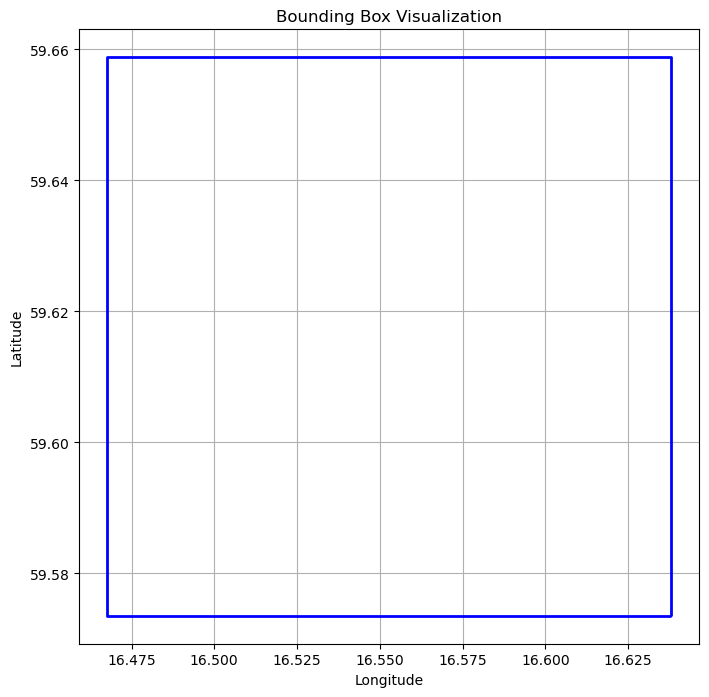

In [11]:
import matplotlib.pyplot as plt
from shapely.geometry import box
import geopandas as gpd

# Define the bounding box (using the earlier example for Västerås)
bbox = {
    'east': 16.6379,  # max long
    'south': 59.5735, # min lat
    'west': 16.4677,  # min long
    'north': 59.6588, # max lat
}

# Create a Shapely box object from the bounding box coordinates
bounding_box = box(bbox['west'], bbox['south'], bbox['east'], bbox['north'])

# Create a GeoDataFrame to plot the box
gdf = gpd.GeoDataFrame({"geometry": [bounding_box]}, crs="EPSG:4326")

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
gdf.boundary.plot(ax=ax, linewidth=2, color="blue")
ax.set_title("Bounding Box Visualization")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid(True)
plt.show()


## 4. Understanding Coordinate Reference Systems (CRS) and OpenEO

When working with geospatial data in OpenEO, it's essential to understand Coordinate Reference Systems (CRS). A CRS defines how the two-dimensional, projected map in your GIS relates to real places on Earth. 

### Why WGS84 (EPSG:4326) Matters in OpenEO

- **WGS84 (EPSG:4326)**: This is the global standard CRS, using latitude and longitude to define locations. OpenEO requires all bounding boxes and spatial queries to be in WGS84. This ensures consistency and compatibility across different datasets and services.
- **SWEREF 99 TM (EPSG:3006)**: In Sweden, we often use a local CRS like EPSG:3006 for precise mapping. However, when querying OpenEO, it's crucial to convert these local coordinates into WGS84 to ensure the query is correctly understood.

In this section, we'll explore how to handle CRS when working with bounding boxes. We'll define a bounding box in EPSG:3006, transform it to WGS84, and understand how OpenEO interprets these coordinates.
### Example 1 Bounding box in SWEREF99 (EPSG:3006)

In [ ]:
from pyproj import CRS, Transformer

# 1. Define the bounding box in EPSG:3006
bbox_3006 = {
    'west': 582000,  # Example coordinates for Västerås
    'south': 6600000,
    'east': 587000,
    'north': 6605000,
}

# 2. Create a transformer object for converting EPSG:3006 to EPSG:4326
transformer = Transformer.from_crs(CRS.from_epsg(3006), CRS.from_epsg(4326), always_xy=True)

# 3. Transform the coordinates
west, south = transformer.transform(bbox_3006['west'], bbox_3006['south'])
east, north = transformer.transform(bbox_3006['east'], bbox_3006['north'])

# 4. Define the bounding box in WGS84
bbox_wgs84 = {
    'west': west,
    'south': south,
    'east': east,
    'north': north,
}

print("Bounding Box in WGS84:", bbox_wgs84)


### Example 2 WKT From e.g Online Tool In SWEREF99 (EPSG:3006)

In [15]:
from shapely import wkt
from shapely.geometry import mapping
from shapely.ops import transform
from pyproj import CRS, Transformer

# 1. Define a WKT polygon in EPSG:3006 (Västerås area)
wkt_polygon_3006 = "POLYGON((582000 6600000, 582000 6605000, 587000 6605000, 587000 6600000, 582000 6600000))"

# 2. Convert the WKT string to a Shapely geometry
polygon_3006 = wkt.loads(wkt_polygon_3006)

print("WKT Polygon in EPSG:3006:", wkt_polygon_3006)

# 3. Create a transformer object for converting EPSG:3006 to EPSG:4326
transformer = Transformer.from_crs(CRS.from_epsg(3006), CRS.from_epsg(4326), always_xy=True)

# 4. Transform the polygon coordinates
polygon_wgs84 = transform(transformer.transform, polygon_3006)

# 5. Convert to GeoJSON format
geojson_wgs84 = mapping(polygon_wgs84)

print("GeoJSON Polygon in WGS84:", geojson_wgs84)

# 6. Extract the bounding box from the GeoJSON
minx, miny, maxx, maxy = polygon_wgs84.bounds

bbox_wgs84 = {
    'west': minx,
    'south': miny,
    'east': maxx,
    'north': maxy,
}

print("Bounding Box in WGS84:", bbox_wgs84)


WKT Polygon in EPSG:3006: POLYGON((582000 6600000, 582000 6605000, 587000 6605000, 587000 6600000, 582000 6600000))
GeoJSON Polygon in WGS84: {'type': 'Polygon', 'coordinates': (((16.449698948642272, 59.53031938852575), (16.451629377958994, 59.575204380195444), (16.540107256525804, 59.57419369956827), (16.53805927601526, 59.529310509301894), (16.449698948642272, 59.53031938852575)),)}
Bounding Box in WGS84: {'west': 16.449698948642272, 'south': 59.529310509301894, 'east': 16.540107256525804, 'north': 59.575204380195444}


# Summary: Working with GeoJSON, WKT, and Bounding Boxes

In this exercise, we've explored the fundamental aspects of working with GeoJSON, WKT, and bounding boxes in geospatial analysis. Understanding these formats and how to transform them is essential when interacting with OpenEO and other geospatial platforms.

#### Key Takeaways:

1. **GeoJSON and WGS84**:
   - **GeoJSON**: A widely used format for representing geographical features, such as points, lines, and polygons.
   - When using tools like the [Bounding Box Tool by KlokanTech](https://boundingbox.klokantech.com/), you can generate GeoJSON for any region of interest. However, it's crucial to ensure that the GeoJSON is in the **WGS84 (EPSG:4326)** coordinate reference system, as this is required by OpenEO for spatial queries.

2. **WKT and Transformations**:
   - **WKT (Well-Known Text)**: A text markup language for representing vector geometry objects, such as points, lines, and polygons.
   - If you have a WKT representation in a local CRS, such as EPSG:3006 (commonly used in Sweden), you must transform it to WGS84. We demonstrated how to do this using Python libraries, converting the WKT to a GeoJSON format and then extracting the bounding box.

3. **Using Bounding Boxes in OpenEO**:
   - **Bounding Boxes**: A simple way to define spatial extents using four coordinates (east, west, north, south). In OpenEO, bounding boxes must be in the WGS84 CRS.
   - We showed how to extract a bounding box from a GeoJSON and how to represent it in the OpenEO-specific format.

### Looking Ahead:

In the upcoming exercises, you'll apply what you've learned to load data from the Digital Earth Sweden platform using bounding boxes and geometries. You'll see how these spatial definitions help you focus on specific areas of interest, allowing for more efficient and targeted data retrieval.

Understanding how to correctly format and transform your spatial data ensures that your queries are accurate and that the data you retrieve matches your intended area of analysis. This foundational knowledge will be crucial as you dive deeper into the capabilities of OpenEO and geospatial analysis.
